In [15]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm_notebook as tqdm

df1 = pd.read_csv("/home/rcardiff/ryan/ryan/neg_test.tsv", sep='\t')
df2 = pd.read_csv('/home/rcardiff/ryan/ryan/df_features1.tsv', sep = '\t')

In [ ]:
df2

In [26]:
from numpy import mean

int_tot = df1[['CL1.mzXML','CL2.mzXML','CL3.mzXML','CL5.mzXML','CL6.mzXML','CL7.mzXML','CL8.mzXML','CL9.mzXML','CL10.mzXML','CL11.mzXML','CL14.mzXML','CL16.mzXML']].sum(axis = 1, skipna =True)
mean(int_tot)

delta_rt1 = df1['rtmax'][df1["mzmed"].between(150,250,inclusive=True)] - df1['rtmin'][df1["mzmed"].between(150,250,inclusive=True)]


## Histograms

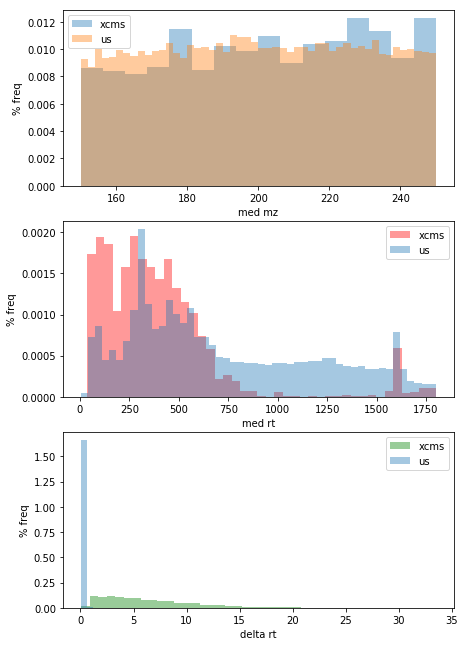

In [49]:
f, axes = plt.subplots(3, 1, figsize=(7, 11), sharex=False)
ax1 = sb.distplot(df1['mzmed'][df1["mzmed"].between(150,250,inclusive=True)], kde = False, norm_hist=True, ax = axes[0], label = 'xcms')
ax1 = sb.distplot(df2['med_mz'][df2["med_mz"].between(150,250,inclusive=True)], kde = False, norm_hist=True, ax = axes[0], label = 'us')
ax1.set(xlabel = 'med mz', ylabel = '% freq')
ax1.legend()

ax2 = sb.distplot(df1['rtmed'][df1["mzmed"].between(150,250,inclusive=True)], kde = False, color = 'red', norm_hist=True, ax = axes[1],label='xcms')
ax2 = sb.distplot(60*df2['med_rt'][df2["med_mz"].between(150,250,inclusive=True)], kde = False, norm_hist=True, ax = axes[1],label='us')
ax2.set(xlabel='med rt', ylabel='% freq')
ax2.legend()

ax3 = sb.distplot(delta_rt1,kde=False,color='green',norm_hist=True,ax=axes[2],label='xcms')
delta_rt = df2['max_rt'][df2["med_mz"].between(150,250,inclusive=True)] - df2['min_rt'][df2["med_mz"].between(150,250,inclusive=True)]
ax3 = sb.distplot(delta_rt,kde=False,norm_hist=True,ax=axes[2],label='us')
ax3.set(xlabel='delta rt', ylabel='% freq')
ax3.legend()

plt.show()


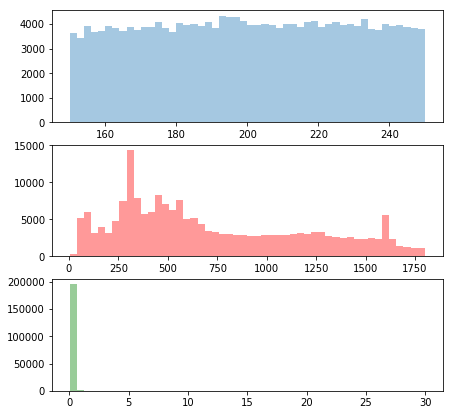

In [17]:
f, axes = plt.subplots(3, 1, figsize=(7, 7), sharex=False)
sb.distplot(df2['med_mz'][df2["med_mz"].between(150,250,inclusive=True)], kde = False, ax = axes[0])
sb.distplot(60*df2['med_rt'][df2["med_mz"].between(150,250,inclusive=True)], kde = False, color = 'red', ax = axes[1])
delta_rt = df2['max_rt'][df2["med_mz"].between(150,250,inclusive=True)] - df2['min_rt'][df2["med_mz"].between(150,250,inclusive=True)]
sb.distplot(delta_rt,kde=False,color='green',ax=axes[2])

In [1]:
print("a")

a


In [6]:
len(df1['mzmed'][df1["mzmed"].between(150,250,inclusive=True)])

3368

## Scatterplot of mzmed, rtmed, and intensity

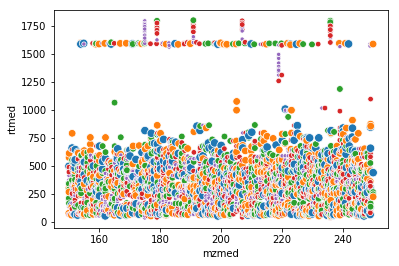

In [116]:
df1['bin'] = pd.qcut(int_tot, 5)
ax = sb.scatterplot(x="mzmed", y="rtmed", data=df1[df1["mzmed"].between(150,250,inclusive=True)], hue = 'bin', size = 'bin',legend =False)


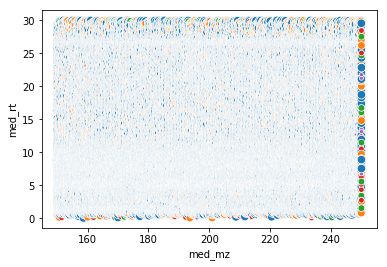

In [39]:
df2['bin'] = pd.qcut(df2['total_int'], 5)
ax = sb.scatterplot(x="med_mz", y="med_rt", data=df2[df2["med_mz"].between(150,250,inclusive=True)],hue = 'bin', size = 'bin',legend =False)